In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings

def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) # Making the float outputs limit to 3 decimal points

/kaggle/input/playground-series-s3e25/sample_submission.csv
/kaggle/input/playground-series-s3e25/train.csv
/kaggle/input/playground-series-s3e25/test.csv


# **Data Exploration and Pre-processing**

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s3e25/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e25/test.csv')
samp_sub = pd.read_csv('/kaggle/input/playground-series-s3e25/sample_submission.csv')

In [3]:
train.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.000,0.842,10.000,4.800,20.613,11.088,2.766,1.732,0.860,0.496,0.915,6.000
1,1,100.000,7.558,10.000,4.800,20.299,12.041,2.755,1.631,0.910,0.493,0.718,6.500
2,2,76.000,8.886,15.600,5.600,33.739,12.086,2.828,1.788,0.864,0.481,1.506,2.500
3,3,100.000,8.795,10.000,4.800,20.213,10.948,2.648,1.626,0.936,0.489,0.789,6.000
4,4,116.000,9.578,11.600,4.800,24.988,11.824,2.766,1.682,0.896,0.493,1.865,6.000


In [4]:
test.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,10407,884.000,121.420,35.360,5.280,82.561,9.370,2.298,1.907,1.200,0.462,1.795
1,10408,90.000,9.932,18.000,5.600,39.568,12.086,2.868,1.652,0.864,0.476,1.412
2,10409,116.000,7.768,11.600,4.800,23.232,11.024,2.644,1.794,0.960,0.500,0.788
3,10410,100.000,9.108,10.000,4.800,20.299,12.086,2.828,1.662,0.792,0.496,1.205
4,10411,55.000,4.030,11.000,4.000,22.978,11.281,2.455,1.750,0.893,0.476,0.935


In [5]:
samp_sub.head()

,id,Hardness
0,10407,4.647
1,10408,4.647
2,10409,4.647
3,10410,4.647
4,10411,4.647


In [6]:
train.isnull().mean()*100

id                      0.000
allelectrons_Total      0.000
density_Total           0.000
allelectrons_Average    0.000
val_e_Average           0.000
atomicweight_Average    0.000
ionenergy_Average       0.000
el_neg_chi_Average      0.000
R_vdw_element_Average   0.000
R_cov_element_Average   0.000
zaratio_Average         0.000
density_Average         0.000
Hardness                0.000
dtype: float64

In [7]:
test.isnull().mean()*100

id                      0.000
allelectrons_Total      0.000
density_Total           0.000
allelectrons_Average    0.000
val_e_Average           0.000
atomicweight_Average    0.000
ionenergy_Average       0.000
el_neg_chi_Average      0.000
R_vdw_element_Average   0.000
R_cov_element_Average   0.000
zaratio_Average         0.000
density_Average         0.000
dtype: float64

**No null values!**

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


**Looks like a perfect dataset for regression.**

#### **Side: A beautiful module for visualizing null values**

<Axes: >

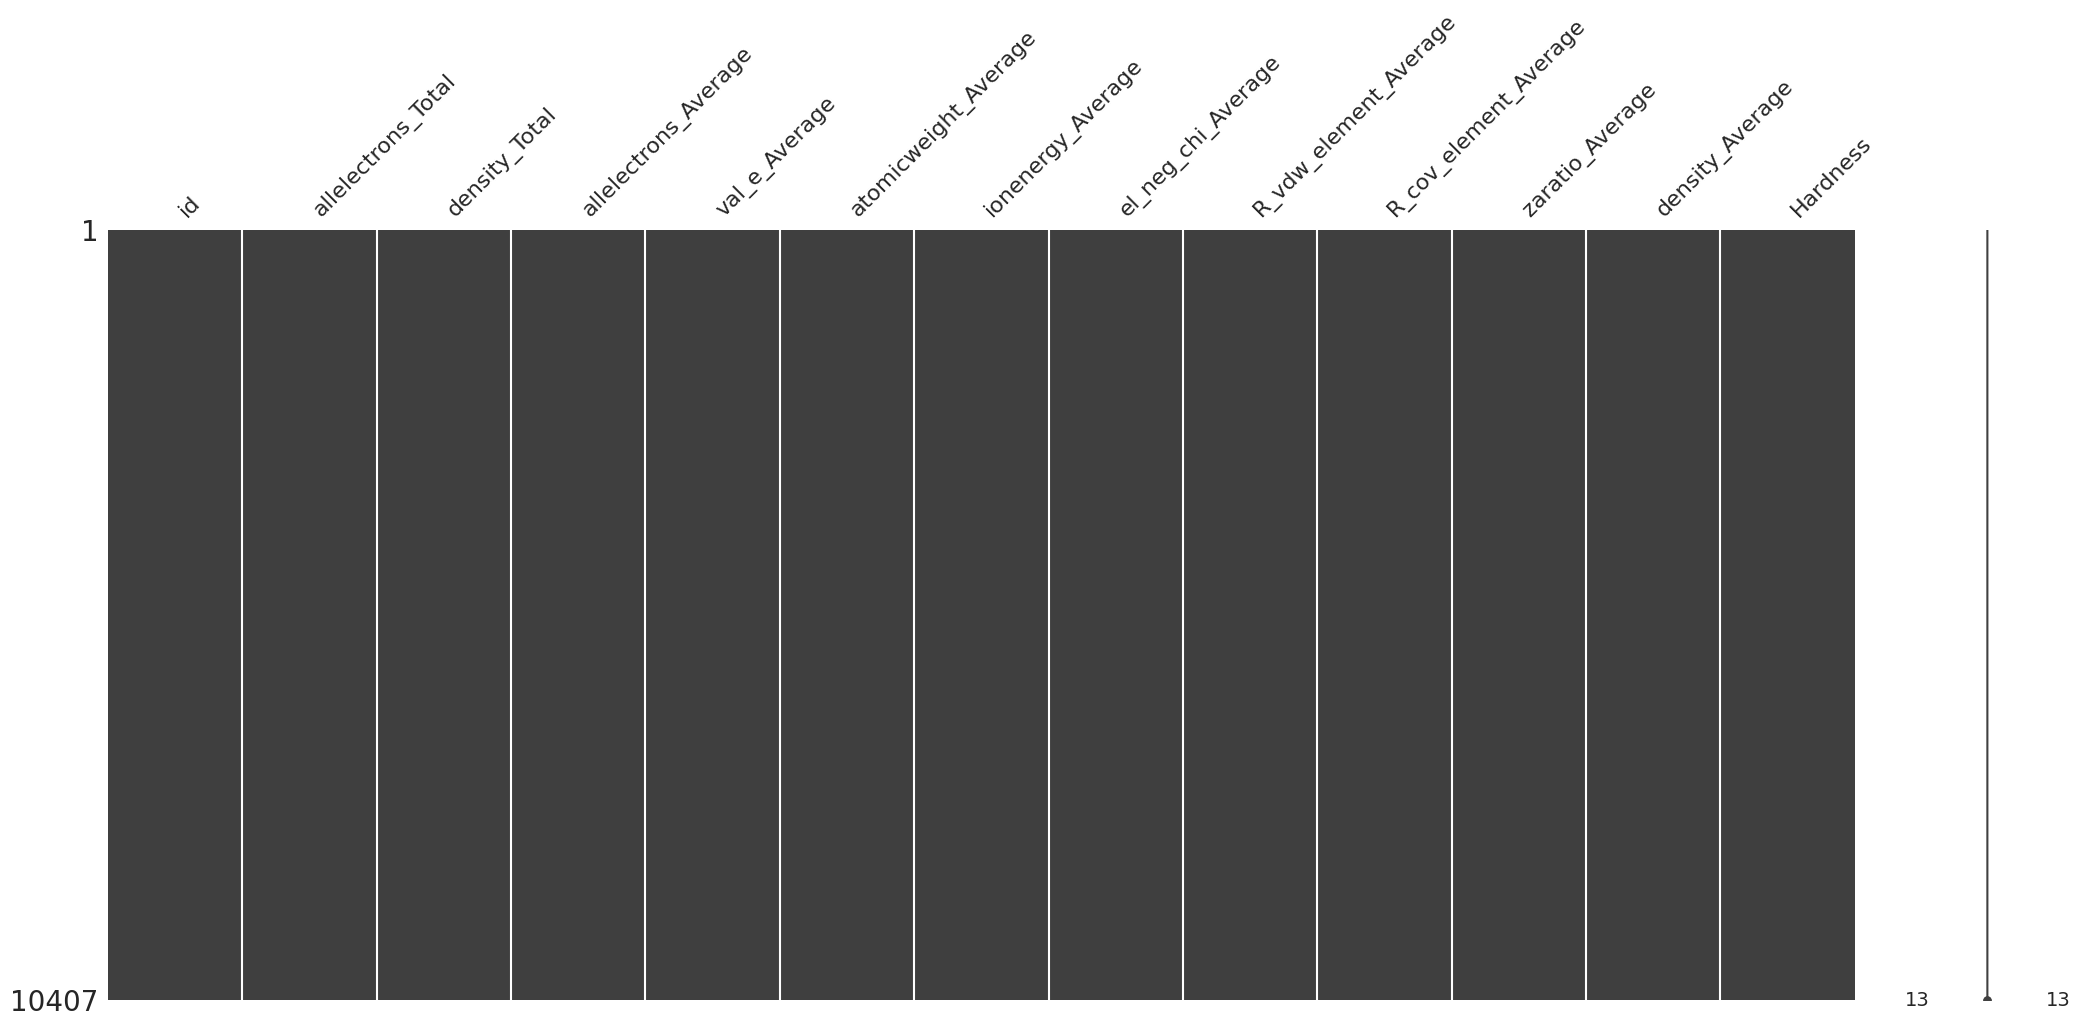

In [9]:
import missingno

missingno.matrix(train, sparkline=True)

## Understanding the Variables

f(x) = y

> f(Colum 0-11) = Hardness

Regression analysis.

<Axes: >

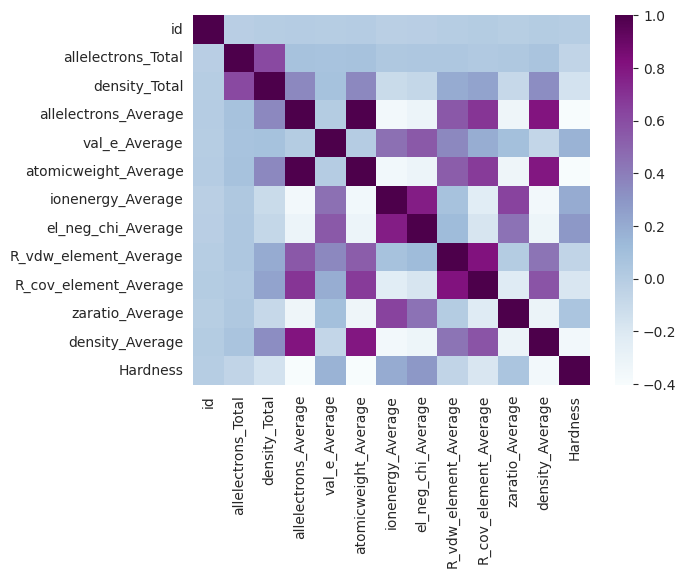

In [10]:
sns.heatmap(train.corr(), cmap = 'BuPu')

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'allelectrons_Total'}>,
        <Axes: title={'center': 'density_Total'}>,
        <Axes: title={'center': 'allelectrons_Average'}>],
       [<Axes: title={'center': 'val_e_Average'}>,
        <Axes: title={'center': 'atomicweight_Average'}>,
        <Axes: title={'center': 'ionenergy_Average'}>,
        <Axes: title={'center': 'el_neg_chi_Average'}>],
       [<Axes: title={'center': 'R_vdw_element_Average'}>,
        <Axes: title={'center': 'R_cov_element_Average'}>,
        <Axes: title={'center': 'zaratio_Average'}>,
        <Axes: title={'center': 'density_Average'}>],
       [<Axes: title={'center': 'Hardness'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

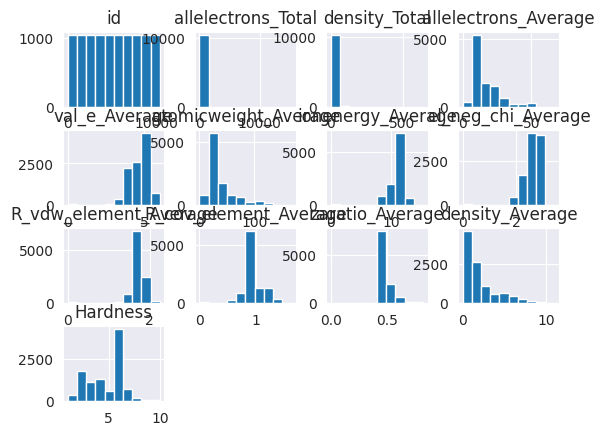

In [11]:
train.hist()

## Before feature engineering, lets get baseline model prediction scores

In [12]:
train = train.drop(columns=['id'], axis=True)

In [13]:
train

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,100.000,0.842,10.000,4.800,20.613,11.088,2.766,1.732,0.860,0.496,0.915,6.000
1,100.000,7.558,10.000,4.800,20.299,12.041,2.755,1.631,0.910,0.493,0.718,6.500
2,76.000,8.886,15.600,5.600,33.739,12.086,2.828,1.788,0.864,0.481,1.506,2.500
3,100.000,8.795,10.000,4.800,20.213,10.948,2.648,1.626,0.936,0.489,0.789,6.000
4,116.000,9.578,11.600,4.800,24.988,11.824,2.766,1.682,0.896,0.493,1.865,6.000
...,...,...,...,...,...,...,...,...,...,...,...,...
10402,128.000,7.558,12.000,4.000,26.385,11.330,2.644,1.631,0.892,0.496,1.796,4.000
10403,30.000,1.743,10.000,5.333,20.767,14.164,3.090,1.557,0.867,0.480,0.815,5.000
10404,196.000,30.920,24.500,5.500,53.490,10.074,2.295,1.545,1.120,0.470,2.115,1.800
10405,38.000,1.553,12.667,4.667,26.622,11.290,2.743,1.757,0.980,0.487,0.778,6.000


In [36]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

### **X and y split for training data**

In [16]:
X_train = train.drop(columns=['Hardness'], axis=1)
y_train = train.Hardness
X_train

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,100.000,0.842,10.000,4.800,20.613,11.088,2.766,1.732,0.860,0.496,0.915
1,100.000,7.558,10.000,4.800,20.299,12.041,2.755,1.631,0.910,0.493,0.718
2,76.000,8.886,15.600,5.600,33.739,12.086,2.828,1.788,0.864,0.481,1.506
3,100.000,8.795,10.000,4.800,20.213,10.948,2.648,1.626,0.936,0.489,0.789
4,116.000,9.578,11.600,4.800,24.988,11.824,2.766,1.682,0.896,0.493,1.865
...,...,...,...,...,...,...,...,...,...,...,...
10402,128.000,7.558,12.000,4.000,26.385,11.330,2.644,1.631,0.892,0.496,1.796
10403,30.000,1.743,10.000,5.333,20.767,14.164,3.090,1.557,0.867,0.480,0.815
10404,196.000,30.920,24.500,5.500,53.490,10.074,2.295,1.545,1.120,0.470,2.115
10405,38.000,1.553,12.667,4.667,26.622,11.290,2.743,1.757,0.980,0.487,0.778


In [17]:
y_train

0       6.000
1       6.500
2       2.500
3       6.000
4       6.000
         ... 
10402   4.000
10403   5.000
10404   1.800
10405   6.000
10406   6.500
Name: Hardness, Length: 10407, dtype: float64

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
import time

model = [LinearRegression(), Ridge(random_state=1), Lasso(random_state=1), ElasticNet(random_state=1), SVR(), RandomForestRegressor(random_state=1), GradientBoostingRegressor(random_state=1), KNeighborsRegressor(), XGBRegressor(random_state=1)]
model_name = ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'SVR', 'RandomForestRegressor', 'GradientBoostingRegressor', 'KNeighborsRegressor', 'XGBRegressor']

for model, model_name in zip(model, model_name):
    pipeline_multiple = Pipeline(steps=[('model', model)])
    pipeline_multiple.fit(X_train, y_train)
    print(model_name)
    start = time.time()
    for score in ['neg_median_absolute_error']:
        print(f'{score}: {-1* cross_val_score(pipeline_multiple, X_train, y_train, scoring=score, cv=3)}')
    print(f'Time Taken: {time.time() - start}\n')

Linear Regression
neg_median_absolute_error: [0.96307716 0.97375503 0.95662468]
Time Taken: 0.07436466217041016

Ridge
neg_median_absolute_error: [0.96678876 0.97713363 0.95727601]
Time Taken: 0.03947710990905762

Lasso
neg_median_absolute_error: [1.08991285 1.08605466 1.09090606]
Time Taken: 0.10170292854309082

ElasticNet
neg_median_absolute_error: [1.08383217 1.08165013 1.08342763]
Time Taken: 0.10193991661071777

SVR
neg_median_absolute_error: [0.88972667 0.90664145 0.88640133]
Time Taken: 11.693075180053711

RandomForestRegressor
neg_median_absolute_error: [0.633 0.684 0.685]
Time Taken: 17.05349326133728

GradientBoostingRegressor
neg_median_absolute_error: [0.67576173 0.71516116 0.72597519]
Time Taken: 4.363093614578247

KNeighborsRegressor
neg_median_absolute_error: [0.8  0.74 0.74]
Time Taken: 0.13647174835205078

XGBRegressor
neg_median_absolute_error: [0.66224213 0.67916842 0.66437435]
Time Taken: 0.7098259925842285



## **Look like Random Forest Regressor performed the best yet.**

Second best: GradientBoostingRegressor
Third best: XGBRegressor

## **Let us make a baseline submission for Random Forest Regressor**

#### We work on Random Forest Classifier:

So, I'm not sure about the n-estimator value, that's why we will:

* Layout a function to calculate accuracy
* Include the pipeline and a 'cross-validation score' in the function
* Call it with different n_estimator values

In [37]:
def get_accuracy(n_estimators):
    local_pipeline = Pipeline(steps=[('model', RandomForestRegressor(n_estimators=n_estimators, random_state=1))])
    scores = cross_val_score(local_pipeline, X_train, y_train, cv=3, scoring='neg_median_absolute_error').mean()
    
    return -1* scores


result = {}
for i in range(1,9):
    result[50*i] = get_accuracy(50*1)  
    
result

{50: 1.5398551109091105,
 100: 1.5398551109091105,
 150: 1.5398551109091105,
 200: 1.5398551109091105,
 250: 1.5398551109091105,
 300: 1.5398551109091105,
 350: 1.5398551109091105,
 400: 1.5398551109091105}

Looks like the n_estimators maxed out at 50 nodes, so

In [42]:
n_best_estimator = 50

### **Lets see if the test data is fit for predictions**

In [38]:
test

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,10407,884.000,121.420,35.360,5.280,82.561,9.370,2.298,1.907,1.200,0.462,1.795
1,10408,90.000,9.932,18.000,5.600,39.568,12.086,2.868,1.652,0.864,0.476,1.412
2,10409,116.000,7.768,11.600,4.800,23.232,11.024,2.644,1.794,0.960,0.500,0.788
3,10410,100.000,9.108,10.000,4.800,20.299,12.086,2.828,1.662,0.792,0.496,1.205
4,10411,55.000,4.030,11.000,4.000,22.978,11.281,2.455,1.750,0.893,0.476,0.935
...,...,...,...,...,...,...,...,...,...,...,...,...
6934,17341,446.000,36.135,9.636,4.636,19.689,11.046,2.769,1.770,0.872,0.499,0.115
6935,17342,36.000,3.550,18.000,4.000,36.069,8.237,1.790,2.055,1.390,0.499,1.350
6936,17343,68.000,4.545,11.333,5.333,22.689,10.938,2.877,1.713,0.917,0.499,0.734
6937,17344,40.000,2.334,6.667,4.000,13.016,12.700,2.770,1.477,0.617,0.664,0.512


In [39]:
X = test.iloc[:,1:]
X

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,884.000,121.420,35.360,5.280,82.561,9.370,2.298,1.907,1.200,0.462,1.795
1,90.000,9.932,18.000,5.600,39.568,12.086,2.868,1.652,0.864,0.476,1.412
2,116.000,7.768,11.600,4.800,23.232,11.024,2.644,1.794,0.960,0.500,0.788
3,100.000,9.108,10.000,4.800,20.299,12.086,2.828,1.662,0.792,0.496,1.205
4,55.000,4.030,11.000,4.000,22.978,11.281,2.455,1.750,0.893,0.476,0.935
...,...,...,...,...,...,...,...,...,...,...,...
6934,446.000,36.135,9.636,4.636,19.689,11.046,2.769,1.770,0.872,0.499,0.115
6935,36.000,3.550,18.000,4.000,36.069,8.237,1.790,2.055,1.390,0.499,1.350
6936,68.000,4.545,11.333,5.333,22.689,10.938,2.877,1.713,0.917,0.499,0.734
6937,40.000,2.334,6.667,4.000,13.016,12.700,2.770,1.477,0.617,0.664,0.512


In [53]:
rfc_baseline_model = RandomForestRegressor(random_state=1, n_estimators=n_best_estimator).fit(X_train, y_train)

In [54]:
preds_baseline_rfr = rfc_baseline_model.predict(X)

In [55]:
output_baseline_rfr = pd.DataFrame({'id': test.id, 'Hardness':preds_baseline_rfr})
output_baseline_rfr.head()

,id,Hardness
0,10407,2.712
1,10408,2.548
2,10409,5.932
3,10410,4.720
4,10411,5.656


In [56]:
output_baseline_rfr.to_csv('submission_baseline_rfr.csv', index=False)
pd.read_csv('submission_baseline_rfr.csv').shape

(6939, 2)

## **Random Forest Regressor Baseline**

It did pretty well actually.

* Score: 0.65599
* Current Rank: 1094

## **Neural Network Regressor Approach**

In [60]:
from sklearn.neural_network import MLPRegressor

pipeline_multiple = Pipeline(steps=[('model', MLPRegressor(activation='relu', hidden_layer_sizes=(200,)))])
pipeline_multiple.fit(X_train, y_train)
print('Neutral Network Regressor')
start = time.time()
for score in ['neg_median_absolute_error']:
    print(f'{score}: {-1* cross_val_score(pipeline_multiple, X_train, y_train, scoring=score, cv=3)}')
print(f'Time Taken: {time.time() - start}\n')

Neutral Network Regressor
neg_median_absolute_error: [1.36441104 0.97721496 5.77099934]
Time Taken: 6.720230340957642



Its not worth working with NNRegressor for this one.

## **XGB Regressor Approach**

In [64]:
pipeline_multiple = Pipeline(steps=[('model', XGBRegressor(SklObjective='reg:squarederror', random_state=1))])
pipeline_multiple.fit(X_train, y_train)
print('Xtreme Gradient Booster Regression')
start = time.time()
for score in ['neg_median_absolute_error']:
    print(f'{score}: {-1* cross_val_score(pipeline_multiple, X_train, y_train, scoring=score, cv=3)}')
print(f'Time Taken: {time.time() - start}\n')

Xtreme Gradient Booster Regression
neg_median_absolute_error: [0.66224213 0.67916842 0.66437435]
Time Taken: 0.7723455429077148



### Grid Search for XGB Regressor

In [66]:
parameters_XGBRegressor = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [72]:
from sklearn.model_selection import GridSearchCV


xgb_model = XGBRegressor(random_state=1)


grid_search_XGB = GridSearchCV(
                    estimator = xgb_model,
                    param_grid = parameters_XGBRegressor,
                    scoring = 'neg_median_absolute_error',
                    n_jobs = -1,
                    cv = 3,
                    verbose =0)

In [73]:
pipeline_grid_xgb = Pipeline(steps=[('gridsearch', grid_search_XGB)])

pipeline_grid_xgb.fit(X_train, y_train)

Pipeline(steps=[('gridsearch',
                 GridSearchCV(cv=3,
                              estimator=XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None,
                                                     grow_policy=None,
                                                     importance_type=None,
                                                     interaction_constra...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=1, ...),
                              n_jobs=-1,
                              param_grid={'learning_rate': [0.1, 0.01, 0.05],
                                          'max_depth': range(2, 10),
                                          'n_estimators': range(60, 220, 40)},
                              scoring='neg_median_absolute_error'))])

In [74]:
XGB_final = grid_search_XGB.best_estimator_

In [75]:
xgb_pipeline = Pipeline(steps=[('model', XGB_final)])

xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=1, ...))])

In [76]:
preds_xgb = xgb_pipeline.predict(X)

In [77]:
output_xgb = pd.DataFrame({'id': test.id, 'Hardness':preds_xgb})
output_xgb.head()

,id,Hardness
0,10407,2.645
1,10408,2.841
2,10409,5.714
3,10410,4.055
4,10411,5.748


In [78]:
output_xgb.to_csv('submission_xgb.csv', index=False)
pd.read_csv('submission_xgb.csv').shape

(6939, 2)

## **XGB Regressor Results**

Our score did improve!

* Score: 0.61128
* Current Rank: 853